<a href="https://colab.research.google.com/github/eliponc-code/sim-mat-2025/blob/main/Repaso_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

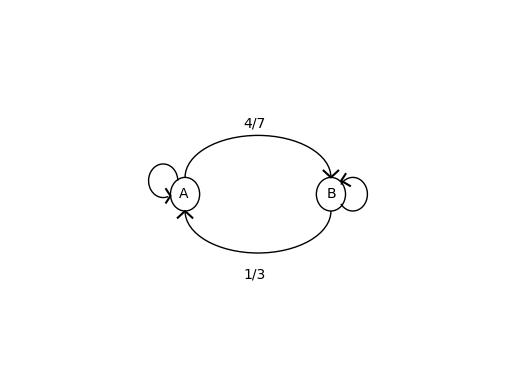

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

In [3]:
import numpy as np

p_A_B = 4/7
p_B_A = 1/3

operaciones = 50
escenarios = 100000

def proceso():
    estado = 'A'
    for i in range(operaciones):
        r = np.random.rand()
        if estado == 'A':
            if r < p_A_B:
                estado = 'B'
        else:
            if r < p_B_A:
                estado = 'A'
    return estado

resultados = [proceso() for _ in range(escenarios)]

prob_B = np.mean(np.array(resultados) == 'B')

print("Probabilidad de terminar en el estado B:", prob_B)

Probabilidad de terminar en el estado B: 0.63386


---
## Problema 2. Simulación de escenarios futuros

Evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2025 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2024 y muestre sus gráficas.

/tmp/ipython-input-4068900603.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


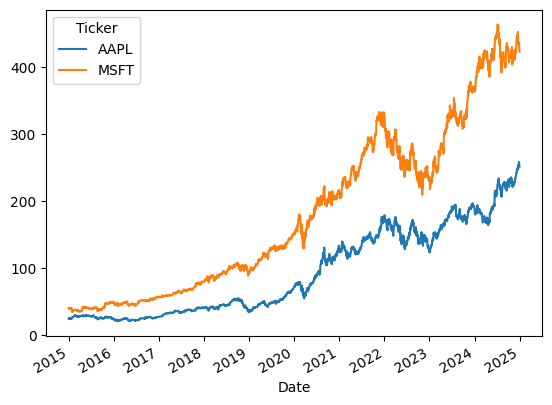

In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT']
data = yf.download(tickers, start='2015-01-01', end='2024-12-31')['Close']

data.plot()
plt.show()

Calcule los rendimientos diarios junto con sus características estadísticas

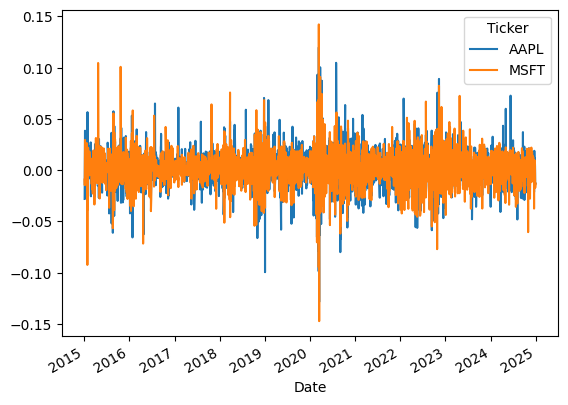

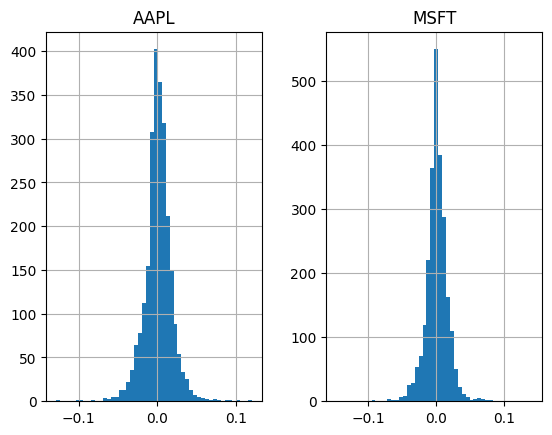

In [14]:
delta=data.pct_change().dropna()
delta.plot()
plt.show()

delta.hist(bins=50,grid=True)
plt.show()

Simule 10000 escenarios de rendimientos diarios para todo el año 2025 (para cada una de las empresas).

In [16]:
N_dias=365
N_escenarios=10000

delta_AAPL=np.random.normal(delta['AAPL'].mean(),delta['AAPL'].std(),(N_dias,N_escenarios))
delta_MSFT=np.random.normal(delta['MSFT'].mean(),delta['MSFT'].std(),(N_dias,N_escenarios))

rango_tiempo=pd.date_range('2025-01-01',periods=N_dias)
delta_AAPL=pd.DataFrame(delta_AAPL,index=rango_tiempo)
delta_MSFT=pd.DataFrame(delta_MSFT,index=rango_tiempo)
delta_AAPL
delta_MSFT

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,0.026302,-0.023297,0.010670,-0.014618,0.030783,0.009223,-0.016116,0.004992,-0.007482,-0.014628,...,-0.011482,0.015578,0.002246,-0.011790,0.016388,0.013831,0.031134,-0.005067,0.012645,-0.003940
2025-01-02,-0.026788,-0.010979,0.006567,0.008145,0.008264,-0.005271,-0.020710,0.007444,0.030431,0.017616,...,-0.015474,-0.012891,0.006820,0.025311,0.014588,0.016341,-0.003270,0.010356,-0.030918,-0.008570
2025-01-03,-0.007464,-0.014727,0.001427,-0.006615,0.027238,0.010072,-0.004576,-0.006086,-0.017244,-0.006720,...,-0.007769,-0.008428,0.012584,0.007495,0.010921,-0.001671,-0.001477,-0.012389,0.022297,0.013259
2025-01-04,0.004397,0.005515,-0.012864,-0.040666,-0.019100,0.006227,0.006909,-0.019746,0.016772,0.019496,...,-0.004244,0.017470,-0.000179,-0.024149,0.003956,0.016644,0.001511,0.003057,0.009001,-0.008197
2025-01-05,0.013680,-0.003432,-0.005635,-0.028922,0.011953,-0.008805,0.017822,0.022799,0.013888,-0.004696,...,-0.001987,-0.010207,0.001770,-0.001451,-0.001867,0.024214,0.000493,-0.009430,-0.001310,0.003106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,-0.009926,0.004234,-0.033903,-0.019029,0.002296,0.013177,-0.006488,0.001485,0.030642,0.010155,...,0.008236,0.004162,0.014235,-0.007128,-0.011776,0.026421,0.017124,-0.003168,0.013217,0.035374
2025-12-28,-0.015105,0.011135,0.026897,0.011026,0.005920,0.028459,-0.006141,0.003156,-0.010119,-0.006208,...,-0.020600,0.005951,0.022234,-0.001480,-0.003551,-0.001513,-0.010708,-0.005755,-0.001094,-0.019699
2025-12-29,0.014949,0.011206,0.002928,-0.016286,-0.011724,-0.007163,0.007474,-0.019876,-0.022792,0.003427,...,-0.024164,0.000184,0.014875,-0.005237,-0.003942,0.019632,-0.000156,0.010075,-0.009248,0.023457
2025-12-30,0.031263,-0.004968,0.006107,-0.020379,-0.001260,-0.012806,0.021156,-0.019493,-0.008665,0.006216,...,0.015230,-0.023261,-0.011024,0.017865,0.011397,-0.007252,0.020082,-0.004022,0.025101,0.026973


Calcule los precios con base en los rendimientos simulados

In [18]:
precios_AAPL=data['AAPL'].iloc[-1]*((delta_AAPL+1).cumprod())
precios_MSFT=data['MSFT'].iloc[-1]*((delta_MSFT+1).cumprod())
precios_AAPL
precios_MSFT

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,433.621022,412.665333,427.016701,416.332152,435.514360,426.405133,415.699058,424.617582,419.347055,416.327726,...,417.657113,429.089964,423.457250,417.526770,429.432314,428.351895,435.662787,420.367591,427.850932,420.843462
2025-01-02,422.005339,408.134594,429.821020,419.723291,439.113390,424.157387,407.090113,427.778571,432.108343,423.661675,...,411.194358,423.558682,426.345427,428.094647,435.696795,435.351791,434.238043,424.721068,414.622552,417.236747
2025-01-03,418.855338,402.124053,430.434245,416.946966,451.073835,428.429600,405.227139,425.175230,424.657075,420.814506,...,407.999679,419.989026,431.710425,431.303208,440.455240,434.624345,433.596492,419.459093,423.867530,422.768867
2025-01-04,420.697189,404.341567,424.897115,399.991202,442.458533,431.097596,408.026958,416.779704,431.779523,429.018811,...,406.268200,427.326137,431.633351,420.887635,442.197829,441.858445,434.251707,420.741189,427.682908,419.303313
2025-01-05,426.452516,402.954057,422.502957,388.422750,447.747278,427.301781,415.298788,426.281756,437.776029,427.004190,...,405.460819,422.964603,432.397513,420.277062,441.372432,452.557496,434.465774,416.773551,427.122822,420.605659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,498.917427,919.869276,655.245778,637.356436,639.822209,542.538531,845.798921,1089.175361,688.830638,691.219732,...,821.601645,484.522507,1123.381016,903.336981,749.739550,598.259974,395.288680,364.264840,524.794926,1012.284625
2025-12-28,491.381373,930.112286,672.869783,644.383944,643.609726,557.978632,840.605274,1092.612762,681.860079,686.928402,...,804.676430,487.405740,1148.358438,901.999986,747.077444,597.355103,391.056080,362.168648,524.220554,992.343913
2025-12-29,498.726968,940.535572,674.839950,633.889808,636.064361,553.981793,846.888001,1070.895706,666.319356,689.282797,...,785.232191,487.495595,1165.440178,897.275859,744.132695,609.082488,390.994945,365.817316,519.372633,1015.621357
2025-12-30,514.318505,935.863319,678.961421,620.972068,635.262680,546.887512,864.804754,1050.020398,660.545902,693.567620,...,797.190918,476.156048,1152.592289,913.305979,752.613304,604.665205,398.846892,364.345887,532.409470,1043.015996


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

<Axes: >

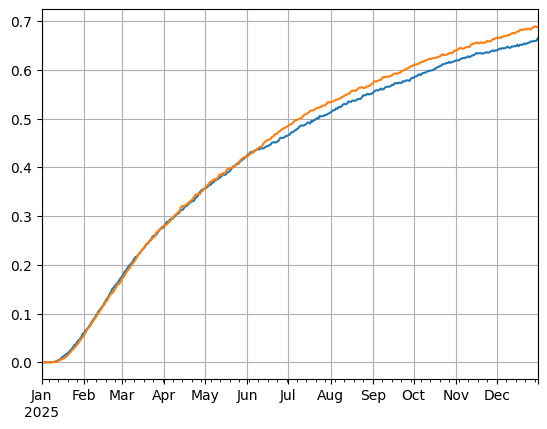

In [19]:
B_AAPL=precios_AAPL>data['AAPL'].iloc[-1]*1.20
proba_AAPL=B_AAPL.mean(axis=1)
proba_AAPL.plot(grid=True)

B_MSFT=precios_MSFT>data['MSFT'].iloc[-1]*1.20
proba_MSFT=B_MSFT.mean(axis=1)
proba_MSFT.plot(grid=True)


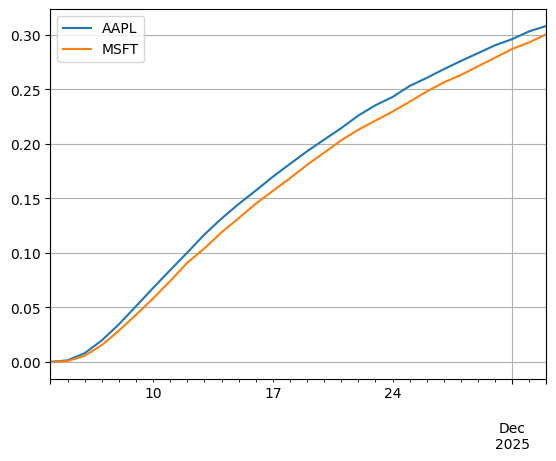

In [20]:
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  delta=data.pct_change().dropna()
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta_sim=pd.DataFrame(delta_sim,index=rango_tiempo)
  precios_simulados=data[ticker].iloc[-1]*((delta_sim+1).cumprod())
  B=precios_simulados>data[ticker].iloc[-1]*1.08
  return B.mean(axis=1)

simulacion(data,'AAPL','2025-11-4',30,100000).plot(grid=True,label='AAPL')
plt.legend()

simulacion(data,'MSFT','2025-11-4',30,100000).plot(grid=True,label='MSFT')
plt.legend()

Finalmente, grafique los datos reales del 2025 para ver que tan acertado fue nuestro análisis.

/tmp/ipython-input-3315779190.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  real = yf.download(tickers, start='2025-01-01', end='2025-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


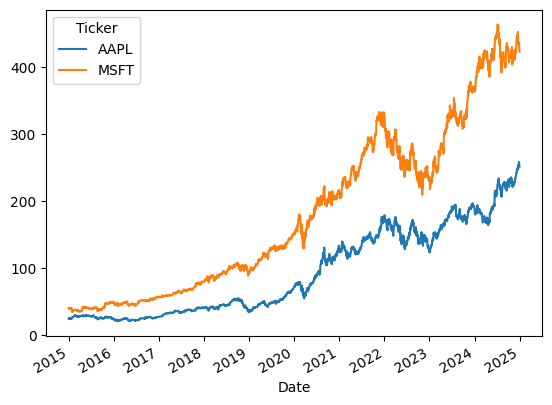

In [23]:
real = yf.download(tickers, start='2025-01-01', end='2025-12-31')['Close']

data.plot()
plt.show()
